# Unsupervised Learning - Clustering

<img src="https://online.keele.ac.uk/wp-content/uploads/2023/07/data-clustering.jpg" width=800>

### Dataset Download  
You can download the CSV file here:  
[https://www.kaggle.com/competitions/tabular-playground-series-jul-2022/data)

### Introduction
This project applies unsupervised clustering to a numerical tabular dataset from Kaggle.
The data is standardized and reduced using PCA before applying KMeans and Gaussian Mixture Models to group similar observations.

### Import Libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import normalize, scale
import joblib
pd.set_option('display.max_columns',100)
import warnings
warnings.filterwarnings('ignore')

### Read Data

In [2]:
df=pd.read_csv('data.csv')

### EDA

In [3]:
df.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,5,13,6,6,-0.469819,0.358126,1.068105,-0.559650,-0.366905,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,4,6,16,9,0.591035,-0.396915,0.145834,-0.030798,0.471167,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,5,8,9,3,11,-0.679875,0.469326,0.349843,-0.288042,0.291470,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,8,9,6,4,-0.389456,0.626762,-1.074543,-1.521753,-1.150806,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,3,1,13,11,-0.120743,-0.615578,-1.064359,0.444142,0.428327,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [4]:
df.tail()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
97995,97995,0.237591,1.657034,-0.689282,0.313710,-0.299039,0.329139,1.607378,5,7,8,5,7,6,7,0.362517,1.010965,-1.001519,0.409882,-0.504114,-0.290116,-0.258141,-0.973640,1.369508,0.391055,2.152426,-0.208944,-1.475403,0.298448,0.445039
97996,97996,0.322696,0.710411,0.562625,-1.321713,-0.357708,0.182024,0.178558,3,9,2,5,3,11,12,0.683558,-1.238120,0.863433,1.318554,-1.125758,0.117687,1.388242,0.342400,1.680537,-0.860409,0.579165,1.162692,0.134994,0.994666,0.727642
97997,97997,-0.249364,-0.459545,1.886122,-1.340310,0.195029,-0.559520,-0.379767,8,9,10,7,5,4,3,-1.337303,0.064310,0.612507,0.398968,-0.409608,-0.850223,-1.787648,-1.268115,-1.508330,1.945622,1.503645,0.194968,2.142693,1.646042,0.641466
97998,97998,0.311408,2.185237,0.761367,0.436723,0.464967,0.062321,-0.334025,1,8,11,11,3,9,5,-0.612314,-0.416691,-0.750458,0.165038,0.333685,-0.010839,1.118906,1.565765,0.358480,0.547615,1.224439,-0.537998,-1.610954,-0.616227,-0.066211
97999,97999,0.755170,0.567483,1.456767,-0.579071,-0.048474,-1.206240,0.784305,0,11,3,8,16,13,5,0.457126,1.143457,-0.889129,-0.201072,-1.095455,1.180805,-0.925705,-1.368680,-2.465425,1.453582,-1.685122,0.129689,-0.970897,1.404988,-0.711098


In [5]:
df.shape

(98000, 30)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98000 entries, 0 to 97999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      98000 non-null  int64  
 1   f_00    98000 non-null  float64
 2   f_01    98000 non-null  float64
 3   f_02    98000 non-null  float64
 4   f_03    98000 non-null  float64
 5   f_04    98000 non-null  float64
 6   f_05    98000 non-null  float64
 7   f_06    98000 non-null  float64
 8   f_07    98000 non-null  int64  
 9   f_08    98000 non-null  int64  
 10  f_09    98000 non-null  int64  
 11  f_10    98000 non-null  int64  
 12  f_11    98000 non-null  int64  
 13  f_12    98000 non-null  int64  
 14  f_13    98000 non-null  int64  
 15  f_14    98000 non-null  float64
 16  f_15    98000 non-null  float64
 17  f_16    98000 non-null  float64
 18  f_17    98000 non-null  float64
 19  f_18    98000 non-null  float64
 20  f_19    98000 non-null  float64
 21  f_20    98000 non-null  float64
 22

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,98000.0,48999.500000,28290.307527,0.000000,24499.750000,48999.500000,73499.250000,97999.000000
f_00,98000.0,0.001220,1.002801,-4.732235,-0.675226,0.002022,0.677271,4.490521
f_01,98000.0,0.005580,1.000742,-4.202795,-0.670985,0.006650,0.677746,4.324974
f_02,98000.0,-0.001042,1.001373,-4.377021,-0.672779,-0.000324,0.677086,4.560247
f_03,98000.0,-0.000700,1.000422,-4.010826,-0.672540,-0.003185,0.672097,4.399373
f_04,98000.0,-0.003522,1.003061,-4.535903,-0.682510,-0.003307,0.677589,4.050549
f_05,98000.0,-0.001612,1.000532,-4.300767,-0.675066,0.001024,0.673344,4.710316
f_06,98000.0,-0.003042,0.997434,-4.894525,-0.680421,-0.002053,0.668112,3.998595
f_07,98000.0,5.545918,3.691840,0.000000,3.000000,5.000000,8.000000,32.000000
f_08,98000.0,6.763061,4.152348,0.000000,4.000000,6.000000,9.000000,30.000000


In [8]:
df.corr()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
id,1.000000,0.002856,-0.005167,0.001404,0.002268,-0.001201,-0.001297,0.001249,-0.003181,0.001774,-0.001422,-0.000181,0.003843,-0.001667,-0.002323,-0.004569,0.000797,0.002766,0.002510,0.001381,-0.001869,0.001981,-0.003020,0.001247,0.000065,0.001376,-0.003301,0.001145,0.004146,0.000309
f_00,0.002856,1.000000,-0.001955,0.002660,0.000105,0.008797,0.003817,0.002903,-0.003847,-0.000866,-0.000976,0.002510,-0.000938,0.004578,-0.001075,-0.003255,0.005267,-0.001998,0.005100,-0.000561,0.000437,0.002687,-0.000447,0.004087,-0.003756,0.001088,0.006216,0.000615,0.003888,0.001103
f_01,-0.005167,-0.001955,1.000000,0.001402,-0.001698,-0.001727,-0.001444,0.001826,0.006539,0.001023,0.003428,0.002071,-0.002024,-0.007009,-0.006544,-0.003968,-0.000157,0.000941,-0.000327,0.003146,-0.001402,-0.001852,0.001099,-0.002965,0.001760,-0.005635,0.000033,-0.001936,0.000229,-0.005528
f_02,0.001404,0.002660,0.001402,1.000000,-0.003271,-0.000732,-0.003743,0.003730,0.002603,0.004888,-0.004690,0.004708,0.001624,0.003369,-0.000620,0.002112,0.005397,-0.003674,-0.002383,0.006187,-0.002743,0.002398,-0.000301,0.004971,0.002971,-0.002328,0.001797,-0.001460,0.002210,0.000544
f_03,0.002268,0.000105,-0.001698,-0.003271,1.000000,0.000238,0.009835,0.002570,-0.000562,0.000095,0.001626,-0.001752,0.003533,-0.002081,-0.004417,0.004566,0.001454,-0.000372,0.003240,0.002039,0.000540,-0.005607,0.006154,0.001807,0.001241,-0.002235,0.000362,0.002074,0.000427,0.001842
f_04,-0.001201,0.008797,-0.001727,-0.000732,0.000238,1.000000,0.004550,0.004143,0.007164,-0.002044,0.002025,-0.003960,0.000218,0.001141,-0.000351,0.001196,-0.002549,-0.003036,-0.002535,0.000748,0.000731,0.000549,-0.000956,0.003801,-0.002564,-0.000324,-0.000765,0.002906,0.001421,-0.003389
f_05,-0.001297,0.003817,-0.001444,-0.003743,0.009835,0.004550,1.000000,0.004825,0.003289,-0.002826,-0.000695,0.002807,-0.001368,-0.000530,-0.001335,0.003204,-0.001235,0.003359,-0.002734,0.002783,0.007995,0.000832,-0.002269,0.002085,-0.003774,0.002300,0.002087,-0.001417,-0.003124,0.002519
f_06,0.001249,0.002903,0.001826,0.003730,0.002570,0.004143,0.004825,1.000000,-0.000300,-0.005988,0.009750,-0.004827,-0.004692,-0.001239,0.000689,-0.000707,0.004625,0.003590,0.004411,-0.006175,-0.005252,0.000395,-0.002691,0.000597,-0.002754,-0.002924,-0.006603,-0.000150,-0.005421,-0.000110
f_07,-0.003181,-0.003847,0.006539,0.002603,-0.000562,0.007164,0.003289,-0.000300,1.000000,-0.131742,0.036707,-0.106755,-0.012389,-0.196534,-0.117606,0.001908,0.000890,0.004975,-0.001435,-0.004443,0.003504,-0.002860,-0.000085,0.003461,-0.091825,0.030238,0.093444,-0.017622,-0.024546,-0.022357
f_08,0.001774,-0.000866,0.001023,0.004888,0.000095,-0.002044,-0.002826,-0.005988,-0.131742,1.000000,-0.360734,-0.051459,0.179527,-0.076524,-0.014362,0.000242,0.000011,-0.006046,-0.000272,-0.000551,0.002888,-0.001366,-0.000753,0.072612,0.028442,0.011038,0.072565,0.085690,-0.015953,-0.029955


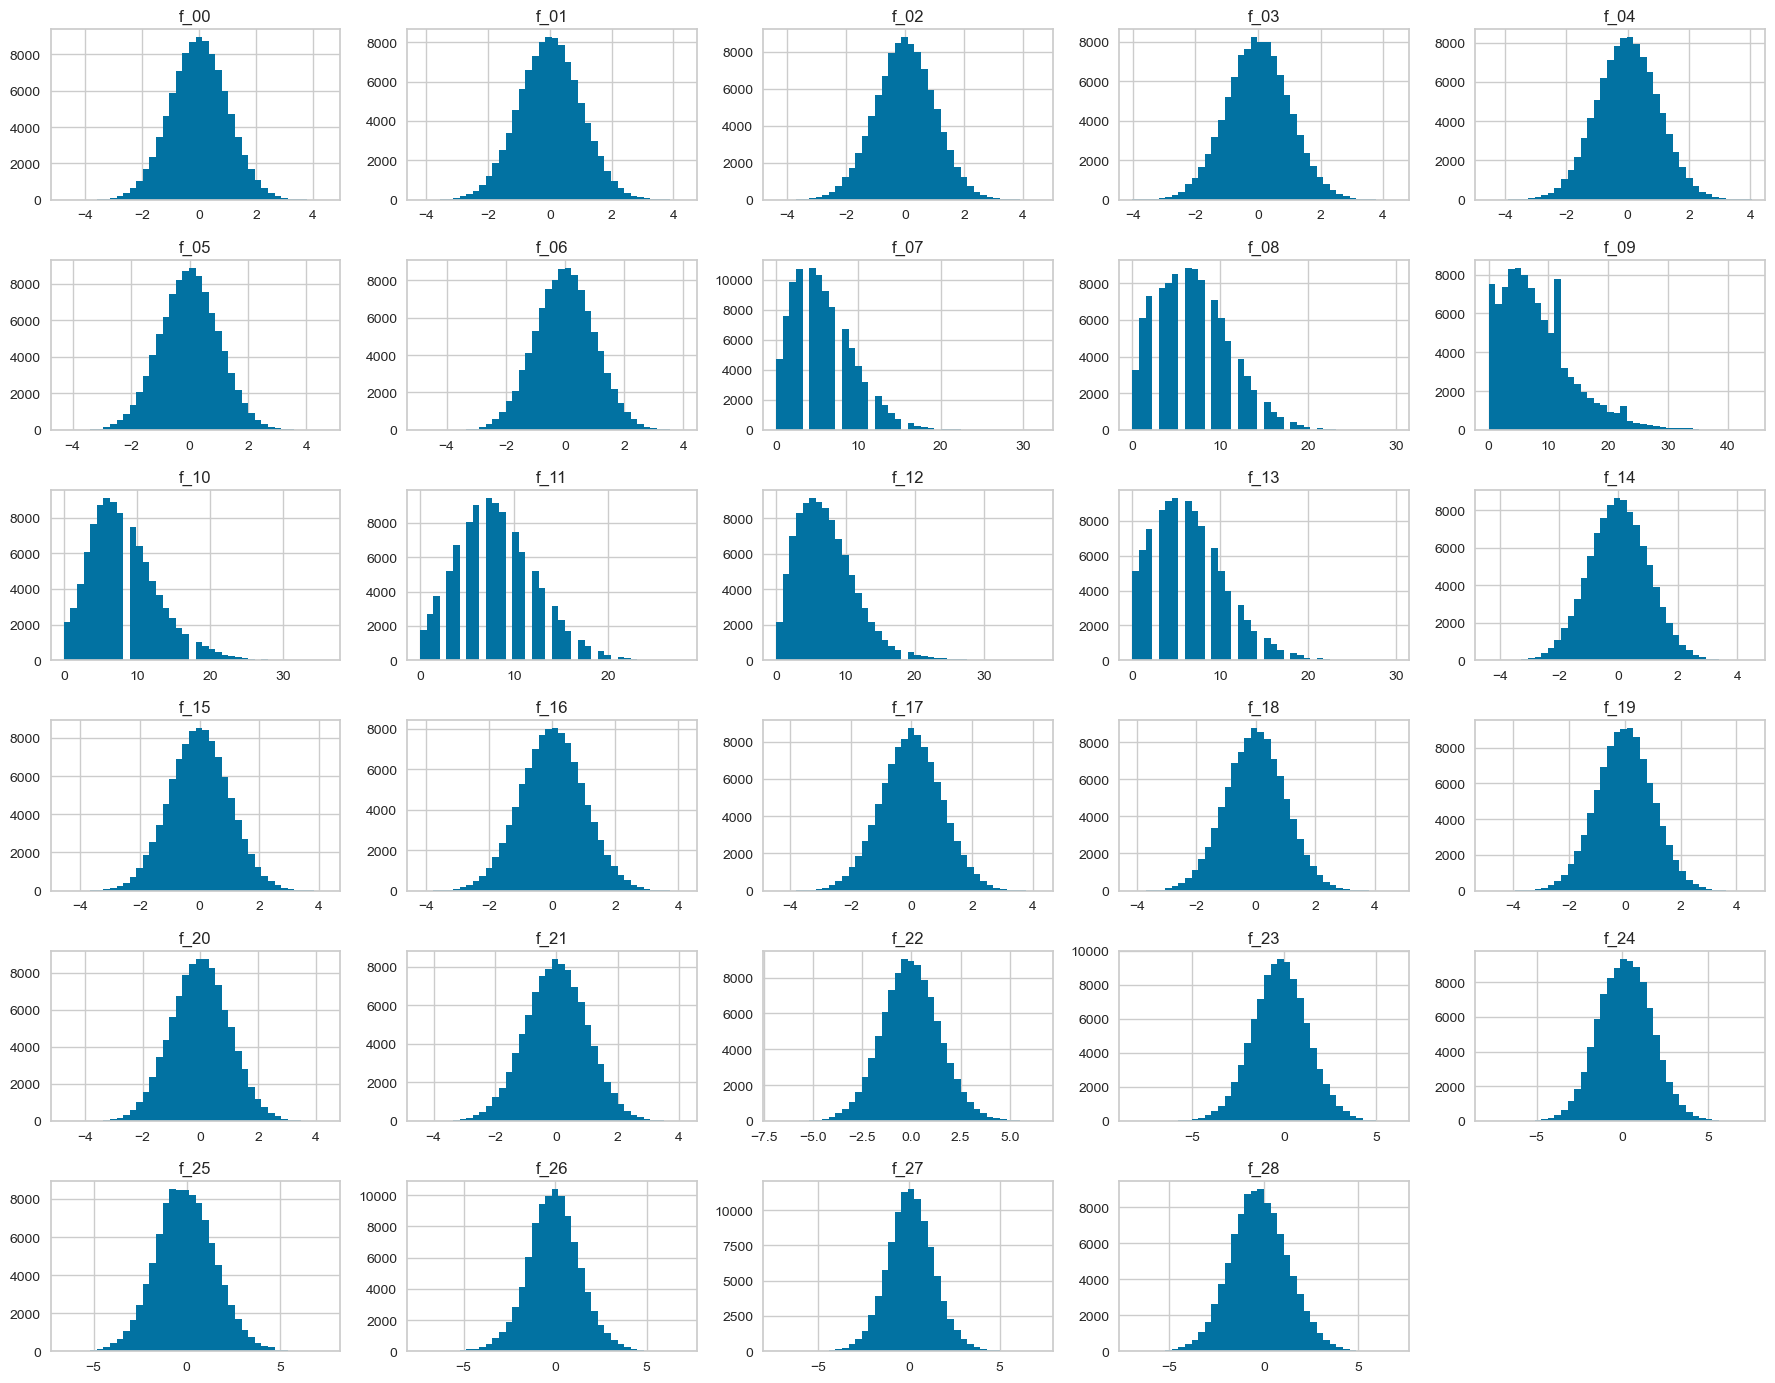

In [9]:
df.drop(columns=['id']).hist(figsize=(18, 14),bins=40)
plt.tight_layout()
plt.show()

Most features are approximately normally distributed and centered around zero, with no extreme skewness.

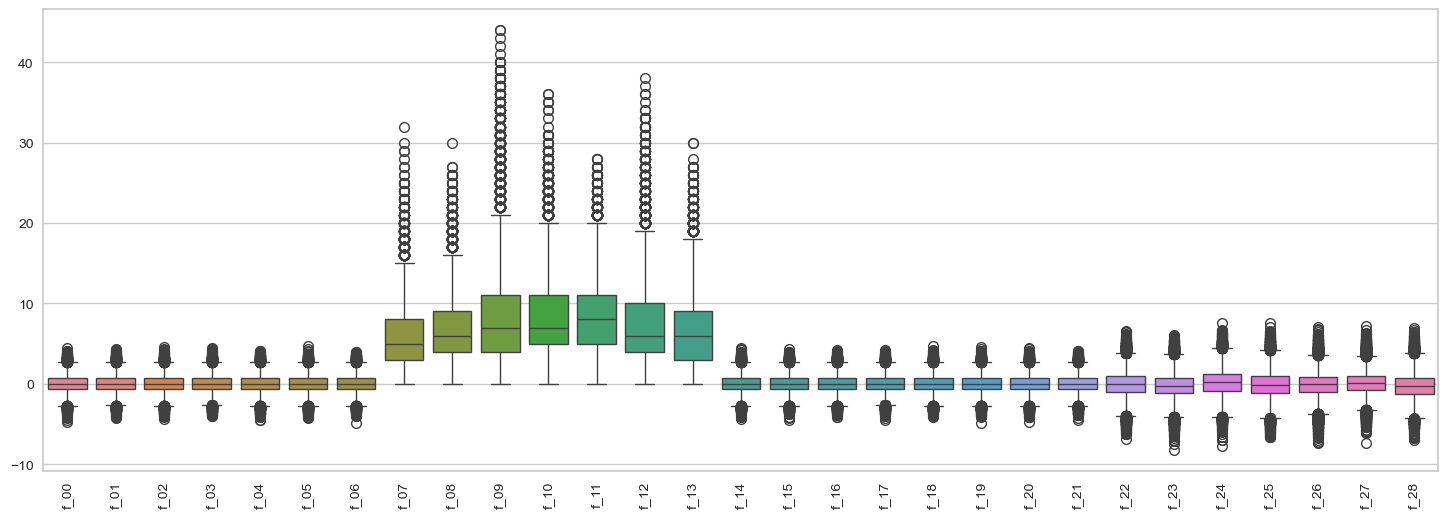

In [10]:
plt.figure(figsize=(18, 6))
sns.boxplot(data=df.drop(columns=['id']))
plt.xticks(rotation=90)
plt.show()

Some features show mild outliers, which supports the use of scaling and PCA before clustering.

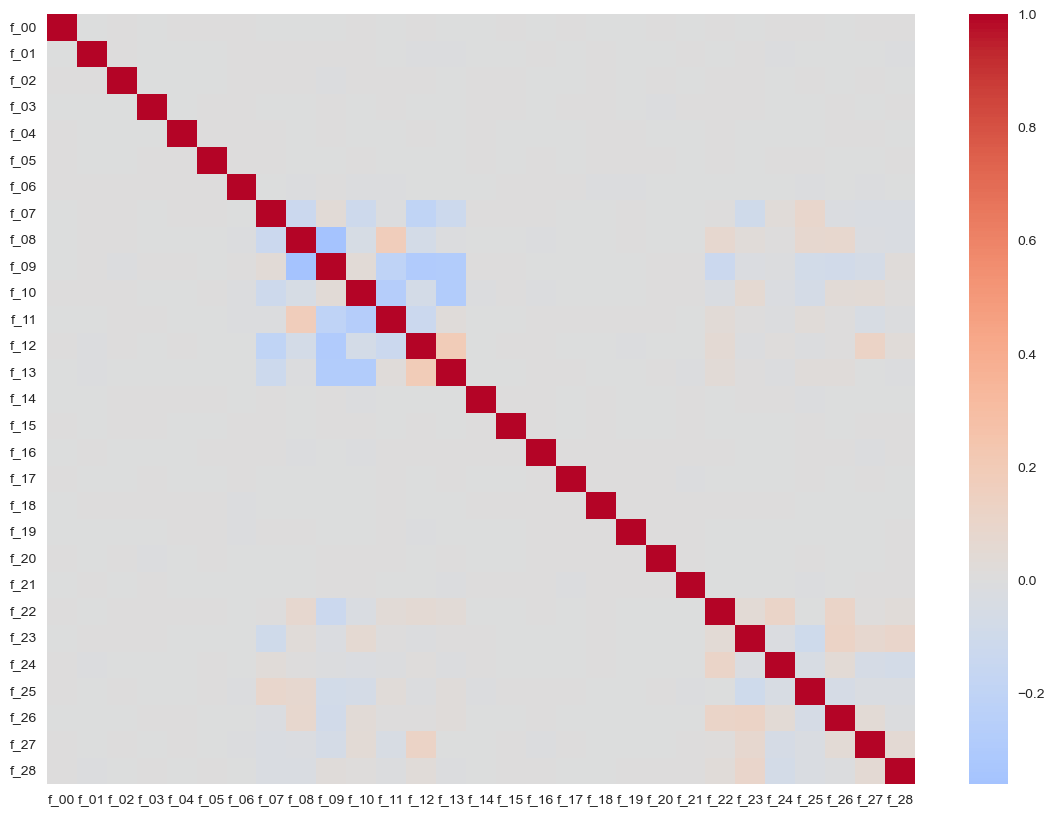

In [11]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.drop(columns=['id']).corr(),cmap='coolwarm',center=0)
plt.show()

Most feature pairs have very weak correlations, indicating low redundancy in the dataset.

### Data Preprocessing

In [12]:
x=df.drop(columns=['id'])

In [13]:
scaler=StandardScaler()

In [14]:
x=scaler.fit_transform(x)

In [15]:
# Dimensionality Reduction
pca=PCA(n_components=0.95,random_state=42)

In [16]:
x=pca.fit_transform(x)

In [17]:
print(x.shape)

(98000, 27)


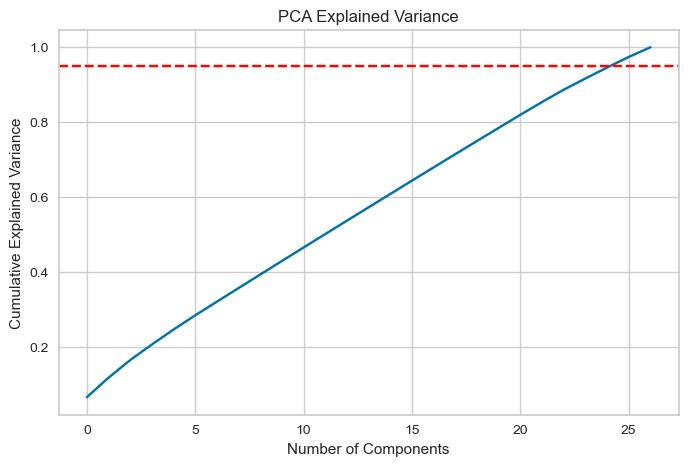

In [18]:
pca=PCA().fit(x)
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(0.95, color='red', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()

About 27 principal components are needed to retain 95% of the total variance.

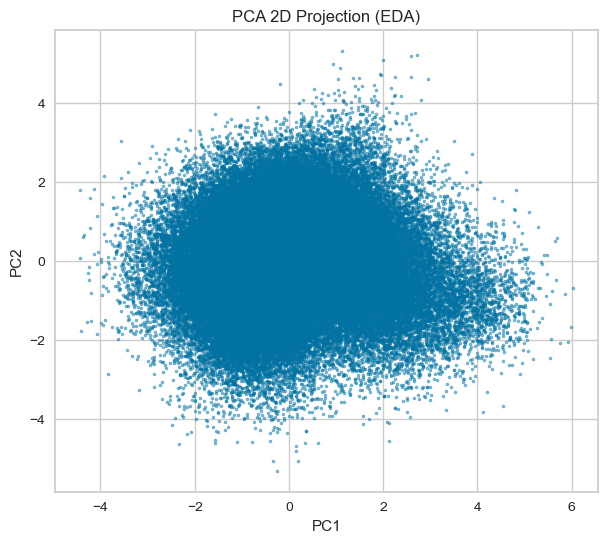

In [19]:
pca2d=PCA(n_components=2, random_state=42)
x2d=pca2d.fit_transform(x)

plt.figure(figsize=(7,6))
plt.scatter(x2d[:,0], x2d[:,1], s=5, alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA 2D Projection (EDA)')
plt.show()

The 2D PCA projection shows overlapping but non-random structure, suggesting potential hidden clusters.

##### KMeans

  File "C:\Users\enesy\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\enesy\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\enesy\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\enesy\anaconda3\Lib\subprocess.

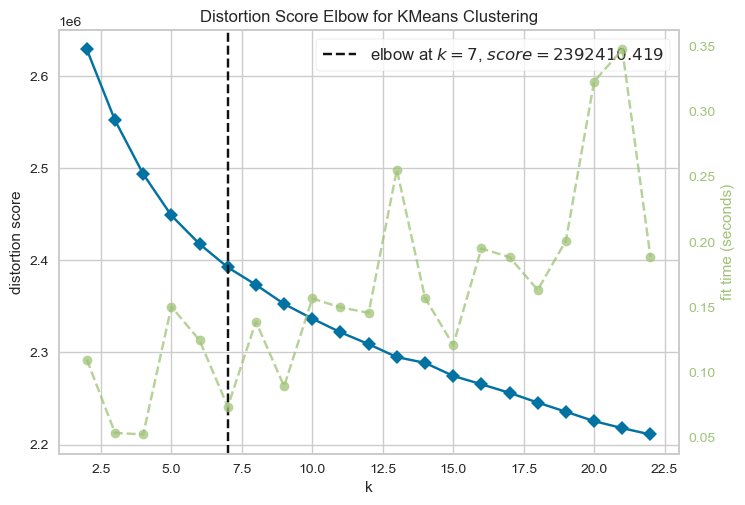

In [20]:
km=KMeans()
vis=KElbowVisualizer(km,k=(2,23))
vis.fit(x)
vis.show();   

The elbow is around k = 9, meaning improvements become much smaller after 9 clusters.

In [21]:
model=KMeans(n_clusters=9, n_init=50, random_state=42)

In [22]:
model=model.fit(x)

In [23]:
tahmin=model.predict(x)

In [24]:
silhouette_score(x,tahmin)

0.03195475334840956

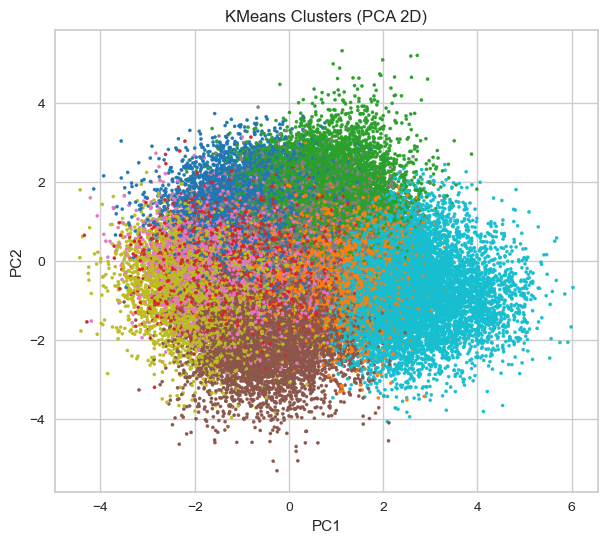

In [25]:
plt.figure(figsize=(7,6))
plt.scatter(x2d[:, 0],x2d[:, 1],c=tahmin,s=5,cmap='tab10')
plt.title('KMeans Clusters (PCA 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

KMeans forms more compact and rigid clusters with clearer geometric boundaries in PCA space.

##### GaussianMixture

In [26]:
model2=GaussianMixture(n_components=9,covariance_type='full',n_init=5,random_state=42)

In [27]:
model2=model2.fit(x)

In [28]:
tahmin2=model2.predict(x)

In [29]:
silhouette_score(x,tahmin2)

0.013243196320369048

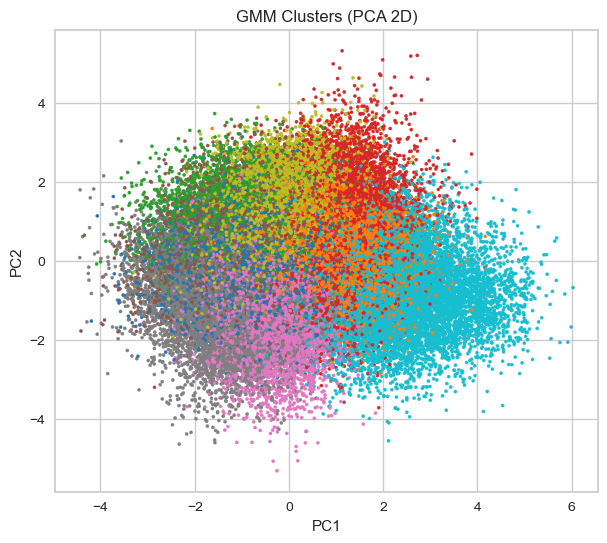

In [30]:
plt.figure(figsize=(7,6))
plt.scatter(x2d[:, 0],x2d[:, 1],c=tahmin2,s=5,cmap='tab10')
plt.title('GMM Clusters (PCA 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

GMM produces softer and more overlapping clusters, capturing more flexible cluster shapes.

In [34]:
feature_names=list(df.drop(columns=['id']).columns)

In [35]:
joblib.dump(feature_names, 'feature_names.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(pca, 'pca.pkl')
joblib.dump(model, 'kmeans_model.pkl')
joblib.dump(model2, 'gmm_model.pkl')

['gmm_model.pkl']

##### Submission

In [36]:
sub=pd.read_csv('sample_submission.csv')

In [37]:
sub.head()

,Id,Predicted
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [38]:
submission_kmeans=pd.DataFrame({'Id': df['id'],'Predicted':tahmin})

In [39]:
submission_kmeans.to_csv('submission_kmeans.csv',index=False)

In [40]:
submission_gmm=pd.DataFrame({'Id': df['id'],'Predicted':tahmin2})

In [41]:
submission_gmm.to_csv('submission_gmm.csv',index=False)

### Conclusion
KMeans and Gaussian Mixture Models were applied after scaling and PCA transformation.
The silhouette score for KMeans was 0.0319, while the Gaussian Mixture Model achieved a silhouette score of 0.0132, indicating overlapping clusters in both approaches.